# Robustness Testing of Current Workflow

## Initialisation

In [1]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path+'\src')
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])


I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
from models.ModelBuilder import ModelBuilder
from models.Reaction import Reaction
from models.ReactionArchtype import ReactionArchtype
from models.ArchtypeCollections import *
from models.Utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import roadrunner
import numpy as np
import pandas as pd

# import scikit-learn
from sklearn.linear_model import LinearRegression
# tree models and support vector machines
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import pearson correlation
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from copy import deepcopy

## Testing 

In [11]:
import os 

### parameters 

notebook_name = 'cp_model_sensitivity_5node'

## Generation of ground truth model 

model_name = 'v3_small_model_52'
o_random_seed = 6
parameter_random_seed = 6
no_observable_species = 5
no_feedback_regulations = 2
specie_value_range = (5, 5000)
param_range = (0.1, 10)
param_multiplier_range = (0.7, 1.3)


## Simulation parameters 

simulation_time = 500 
simulation_step = 100

## Feature data generation 

feature_generation_method = 'uniform'
feature_generation_extra_params = {'min': 0.1, 'max': 10}
feature_generation_size = 1000 
feature_generation_seed = 50 # if -1 then 'o_random_seed' is used
if feature_generation_seed == -1:
    feature_generation_seed = o_random_seed
    
## Data engineering parameters

# Suboptimal Model Generation 

'''
Options: 
- 'feedback_prune': removes feedback regulations from the model 
'''

# Engineering Feature Data 

data_engineering_method = 'dynamic_feature'
''' 
Options: 
- 'last_time_point' : only the last time point of the phosphorylated species is used
- 'dynamic_feature': computes the characteristic 'ten' dynamic feature for each specie data 
'''

## General parameters
parallelise = True
save_figures = True 
experiment_id = notebook_name + '_' + str(o_random_seed) + '_' + str(feature_generation_seed)
experiment_folder = config['DATA_PATH'] + '/' + experiment_id + '/'
if not os.path.exists(experiment_folder):
    os.makedirs(experiment_folder)
    
print(experiment_folder)

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments/cp_model_sensitivity_5node_6_50/


In [12]:
### Generate the ground truth model

model_spec = ModelSpecification()
model_spec.generate_specifications(o_random_seed, no_observable_species, no_feedback_regulations, verbose=0)
G0 = model_spec.generate_network(model_name, specie_value_range, param_range, param_multiplier_range, random_seed=parameter_random_seed, verbose=0)
runner = roadrunner.RoadRunner(G0.get_sbml_model())
res = runner.simulate(0, simulation_time, simulation_step)

In [13]:
print(model_spec.get_feedback_regulations())

[(('B2', 'B4'), 'down'), (('B0', 'B4'), 'down')]


In [14]:
print(model_spec)

A Species: ['A0', 'A1', 'A2', 'A3', 'A4']
B Species: ['B0', 'B1', 'B2', 'B3', 'B4']
C Species: ['C']
Regulations: [('B2', 'B4'), ('B0', 'B4'), ('A0', 'B0'), ('A1', 'B1'), ('A2', 'B2'), ('A3', 'B3'), ('A4', 'B4'), ('B0', 'C'), ('B1', 'C'), ('B2', 'C'), ('B0', 'C'), ('B1', 'C')]
Regulation Types: ['down', 'down', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'down', 'down']
C Weak Stimulators: 0
C Strong Stimulators: 0
C Allosteric Inhibitors: 0
C Competitive Inhibitors: 0



In [15]:
print(G0.get_antimony_model())

model v3_small_model_52

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+A1p*J13_Kw0)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; (J19_Vmax+A4p*J19_Kw0)*B4/(J19_Km*(1+B2p*J19_Kic0+B0p*J19_Kic1) + B4)
J20: C -> Cp; (J20_Vmax+B0p*J20_Kw0+B1p*J20_K

In [30]:
G0.set_state('A0', 10)

In [31]:
print(G0.get_antimony_model())

model v3_small_model_52

J0: A0p -> A0; J0_Vmax*A0p/(J0_Km + A0p)
J1: A0 -> A0p; J1_Vmax*A0/(J1_Km + A0)
J2: A1p -> A1; J2_Vmax*A1p/(J2_Km + A1p)
J3: A1 -> A1p; J3_Vmax*A1/(J3_Km + A1)
J4: A2p -> A2; J4_Vmax*A2p/(J4_Km + A2p)
J5: A2 -> A2p; J5_Vmax*A2/(J5_Km + A2)
J6: A3p -> A3; J6_Vmax*A3p/(J6_Km + A3p)
J7: A3 -> A3p; J7_Vmax*A3/(J7_Km + A3)
J8: A4p -> A4; J8_Vmax*A4p/(J8_Km + A4p)
J9: A4 -> A4p; J9_Vmax*A4/(J9_Km + A4)
J10: B0p -> B0; J10_Vmax*B0p/(J10_Km + B0p)
J11: B0 -> B0p; (J11_Vmax+A0p*J11_Kw0)*B0/(J11_Km + B0)
J12: B1p -> B1; J12_Vmax*B1p/(J12_Km + B1p)
J13: B1 -> B1p; (J13_Vmax+A1p*J13_Kw0)*B1/(J13_Km + B1)
J14: B2p -> B2; J14_Vmax*B2p/(J14_Km + B2p)
J15: B2 -> B2p; (J15_Vmax+A2p*J15_Kw0)*B2/(J15_Km + B2)
J16: B3p -> B3; J16_Vmax*B3p/(J16_Km + B3p)
J17: B3 -> B3p; (J17_Vmax+A3p*J17_Kw0)*B3/(J17_Km + B3)
J18: B4p -> B4; J18_Vmax*B4p/(J18_Km + B4p)
J19: B4 -> B4p; (J19_Vmax+A4p*J19_Kw0)*B4/(J19_Km*(1+B2p*J19_Kic0+B0p*J19_Kic1) + B4)
J20: C -> Cp; (J20_Vmax+B0p*J20_Kw0+B1p*J20_K

In [32]:
runner = roadrunner.RoadRunner(G0.get_sbml_model())

In [33]:
# get all states in runner
states = runner.getFloatingSpeciesAmountsNamedArray()
print(states)

    A0p, A0, A1p,   A1, A2p,   A2, A3p,  A3, A4p,   A4, B0p,  B0, B1p,   B1, B2p,   B2, B3p,   B3, B4p,   B4,   C, Cp
 [[   0, 10,   0, 4057,   0, 1621,   0, 970,   0, 2997,   0, 256,   0, 1014,   0, 1652,   0, 2269,   0, 4789, 100,  0]]



In [34]:
specie_range = np.arange(1, 5000, 100)

def sensitivity_analysis(builder: ModelBuilder, specie_name, specie_range, simulation_time, simulation_step): 
    all_results = []
    for specie in specie_range: 
        builder.set_state(specie_name, specie)
        runner = roadrunner.RoadRunner(builder.get_sbml_model())
        res = runner.simulate(0, simulation_time, simulation_step)
        all_results.append(res)
    return all_results

all_results = sensitivity_analysis(G0, 'A0', specie_range, simulation_time, simulation_step)

        

In [35]:
result_1 = all_results[0]
# get the last time point of Cp 
state_result_1 = result_1['[Cp]']
print(state_result_1)

[0.         1.15607871 1.65427087 1.96962519 2.18780499 2.35116767
 2.48084308 2.5867335  2.67269501 2.74015016 2.79052705 2.82624312
 2.85042889 2.86621532 2.87623336 2.88245702 2.88626131 2.88855793
 2.88993122 2.89074677 2.89122929 2.89151496 2.89168539 2.89178892
 2.89185388 2.89189672 2.89192684 2.89194955 2.89196779 2.89198313
 2.89199641 2.89200814 2.89201858 2.89202789 2.89203617 2.89204348
 2.89204992 2.89205553 2.89206042 2.89206466 2.89206832 2.89207146
 2.89207414 2.89207643 2.89207836 2.89208    2.89208139 2.89208256
 2.89208354 2.89208437 2.89208506 2.89208564 2.89208612 2.89208652
 2.89208685 2.89208713 2.89208736 2.89208755 2.89208771 2.89208785
 2.89208795 2.89208804 2.89208812 2.89208818 2.89208823 2.89208827
 2.8920883  2.89208833 2.89208836 2.89208838 2.89208839 2.89208841
 2.89208842 2.89208843 2.89208844 2.89208844 2.89208845 2.89208845
 2.89208845 2.89208846 2.89208846 2.89208846 2.89208846 2.89208846
 2.89208846 2.89208846 2.89208846 2.89208846 2.89208846 2.8920

In [36]:
print(state_result_1[-1])

2.8920884646980185


In [37]:
def extract_states_from_results(results, state_name, time_point): 
    all_states = []
    for result in results: 
        state = result[f'[{state_name}]']
        all_states.append(state[time_point])
    return all_states

Cp_final_states = extract_states_from_results(all_results, 'Cp', -1)
print(Cp_final_states)

[2.8920884646980185, 2.674777089365648, 2.5923155693213347, 2.552271573638805, 2.529092282103275, 2.5140820684555263, 2.5036005106036217, 2.4958780833749636, 2.4899568405488326, 2.485274705142497, 2.4814807180208507, 2.4783447355344146, 2.4757096176983198, 2.473464488752991, 2.471528887059425, 2.4698430270949343, 2.468361602089231, 2.467049584836376, 2.4658795513823004, 2.4648296570687944, 2.4638823198856077, 2.4630232505645875, 2.4622406821979457, 2.4615248295148793, 2.4608675573895984, 2.460261985360107, 2.4597022330586897, 2.4591833407328023, 2.4587010183371896, 2.458251568108654, 2.457831803323438, 2.4574388911165417, 2.457070433378684, 2.456724251112614, 2.4563984479623904, 2.456091390169554, 2.4558015305872054, 2.4555275832417442, 2.455268382416149, 2.455022819564181, 2.454790001844768, 2.4545689107726254, 2.4543589528130227, 2.454159315126909, 2.453969350534174, 2.453788548085416, 2.4536162562688086, 2.453452039759177, 2.4532953804912587, 2.4531459555519]


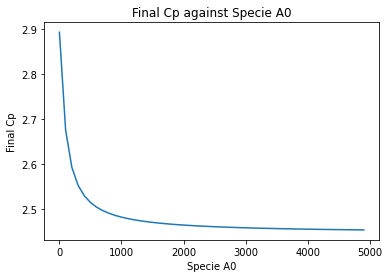

In [38]:
# plot Cp_final_states against specie_range
plt.plot(specie_range, Cp_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final Cp')
plt.title('Final Cp against Specie A0')
plt.show()

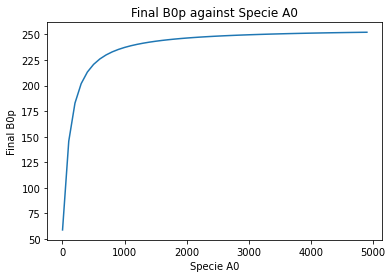

In [39]:
B0p_final_states = extract_states_from_results(all_results, 'B0p', -1)
# plot B0p_final_states against specie_range
plt.plot(specie_range, B0p_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final B0p')
plt.title('Final B0p against Specie A0')
plt.show()


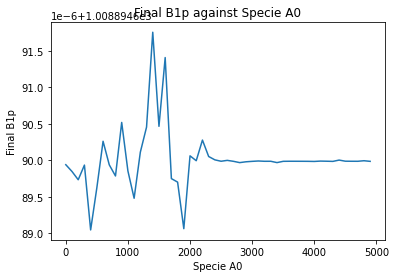

In [40]:
B1p_final_states = extract_states_from_results(all_results, 'B1p', -1)
# plot B0p_final_states against specie_range
plt.plot(specie_range, B1p_final_states)
plt.xlabel('Specie A0')
plt.ylabel('Final B1p')
plt.title('Final B1p against Specie A0')
plt.show()

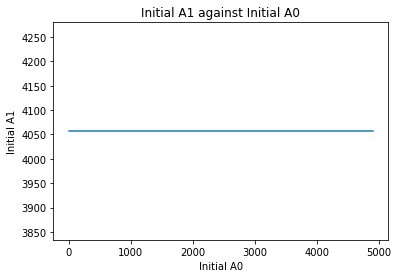

In [41]:
A1_final_states = extract_states_from_results(all_results, 'A1', 0)
# plot B0p_final_states against specie_range
plt.plot(specie_range, A1_final_states)
plt.xlabel('Initial A0')
plt.ylabel('Initial A1')
plt.title('Initial A1 against Initial A0')
plt.show()

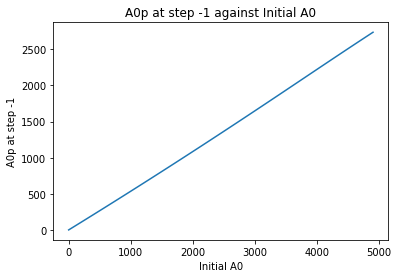

In [42]:
def plot_against_states(specie_range, all_results, state, time_point): 
    states = extract_states_from_results(all_results, state, time_point)
    plt.plot(specie_range, states)
    plt.xlabel('Initial A0')
    plt.ylabel(f'{state} at step {time_point}')
    plt.title(f'{state} at step {time_point} against Initial A0')
    plt.show()
    
plot_against_states(specie_range, all_results, 'A0p', -1)

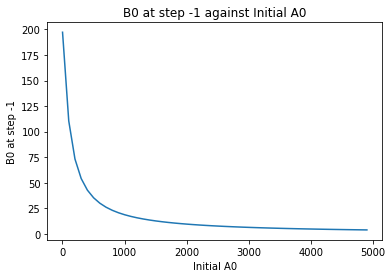

In [43]:
plot_against_states(specie_range, all_results, 'B0', -1)

In [44]:
all_init_species = ['A0', 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4']
all_init_species_results = []
for init_species in all_init_species: 
    all_results = sensitivity_analysis(G0, init_species, specie_range, simulation_time, simulation_step)
    all_init_species_results.append(all_results)

# extract the last time point of Cp for each init species
Cp_final_states = []
for init_species in all_init_species_results: 
    Cp_final_states.append(extract_states_from_results(init_species, 'Cp', -1))
    





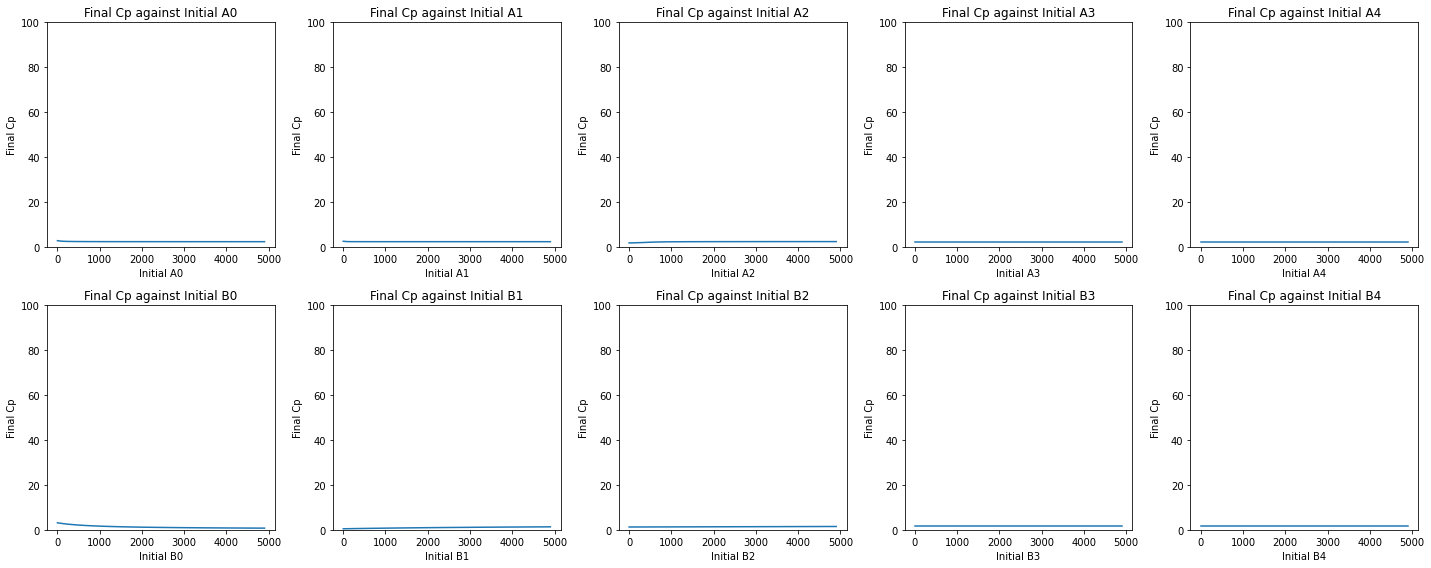

In [45]:
# plot each init species against Cp_final_states in a multiplot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, init_species in enumerate(all_init_species):
    axs[i].plot(specie_range, Cp_final_states[i])
    axs[i].set_xlabel(f'Initial {init_species}')
    axs[i].set_ylabel(f'Final Cp')
    axs[i].set_title(f'Final Cp against Initial {init_species}')
    # make the title a bit higher to avoid overlapping with the significant figures of the y-axis
    axs[i].set_ylim(0, 100)
plt.tight_layout()
plt.show()
if save_figures: 
    fig.savefig(experiment_folder + 'Sensitivity_figure.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

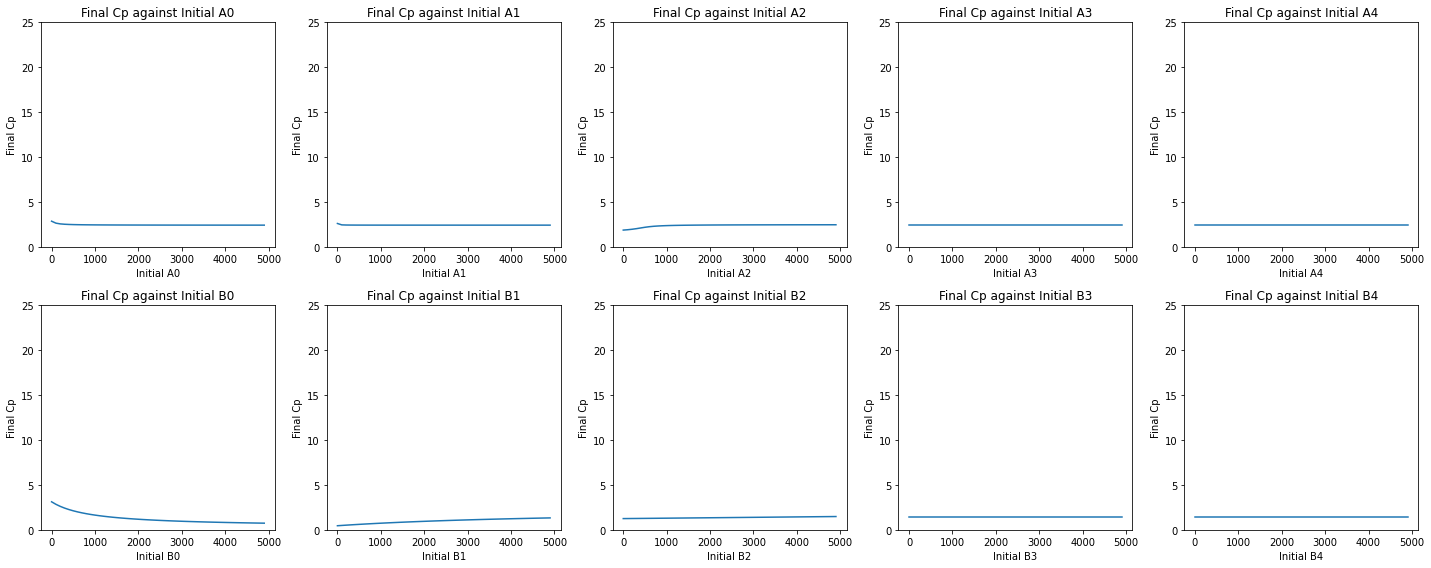

In [46]:
# plot each init species against Cp_final_states in a multiplot
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, init_species in enumerate(all_init_species):
    axs[i].plot(specie_range, Cp_final_states[i])
    axs[i].set_xlabel(f'Initial {init_species}')
    axs[i].set_ylabel(f'Final Cp')
    axs[i].set_title(f'Final Cp against Initial {init_species}')
    # make the title a bit higher to avoid overlapping with the significant figures of the y-axis
    axs[i].set_ylim(0, 25)
plt.tight_layout()
plt.show()



In [47]:
# export the data into the folder as a pkl file 

import pickle
with open(experiment_folder + 'Cp_final_states_sensitivity.pkl', 'wb') as f:
    pickle.dump(Cp_final_states, f)
    
with open(experiment_folder + 'specie_range.pkl', 'wb') as f:
    pickle.dump(specie_range, f)
    